# Linear equaltion using gradient descent


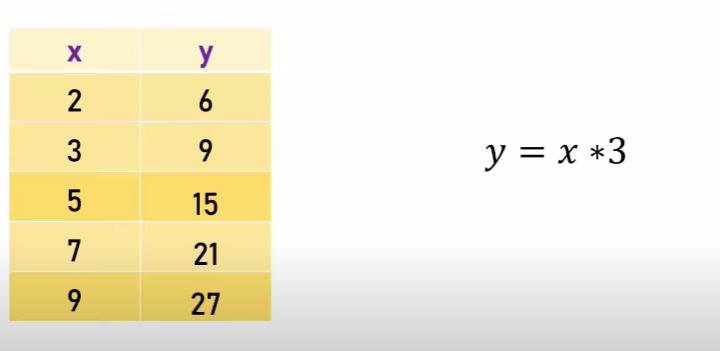


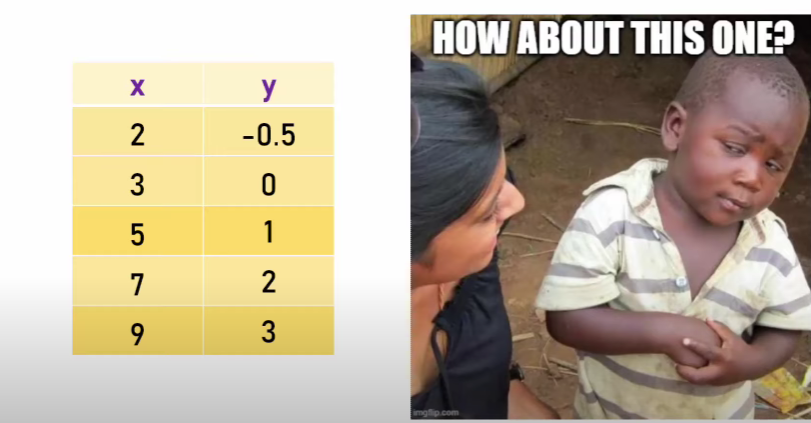


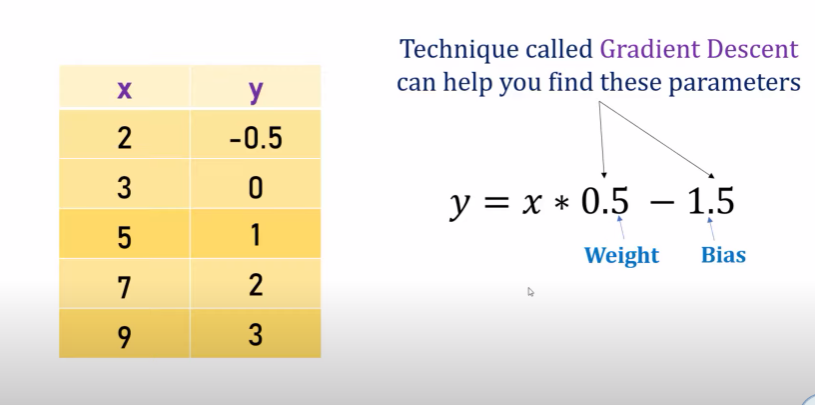


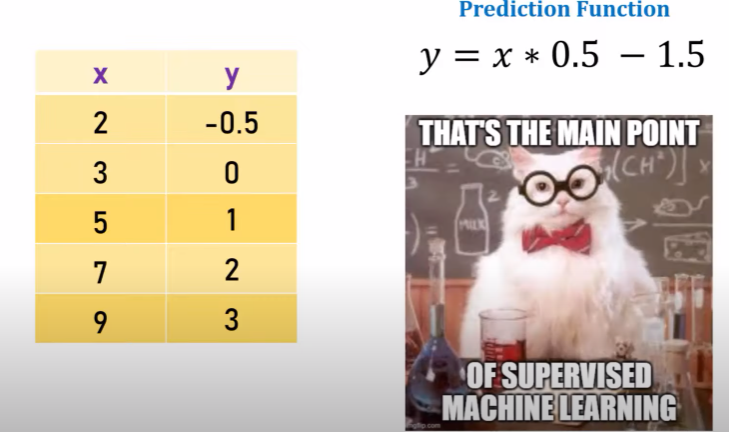


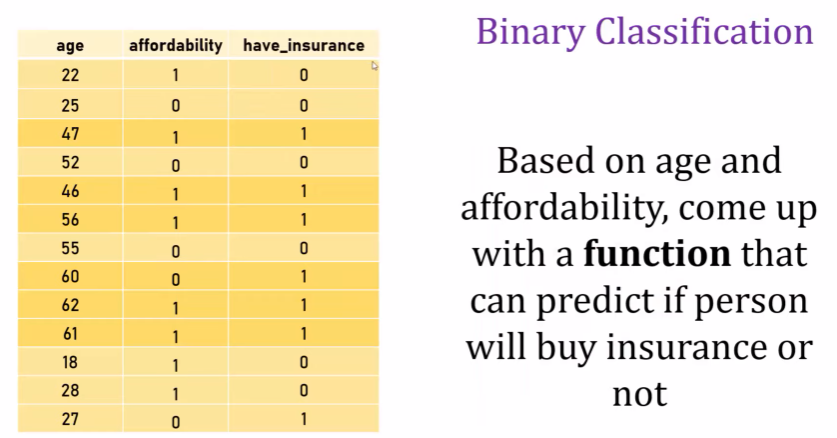


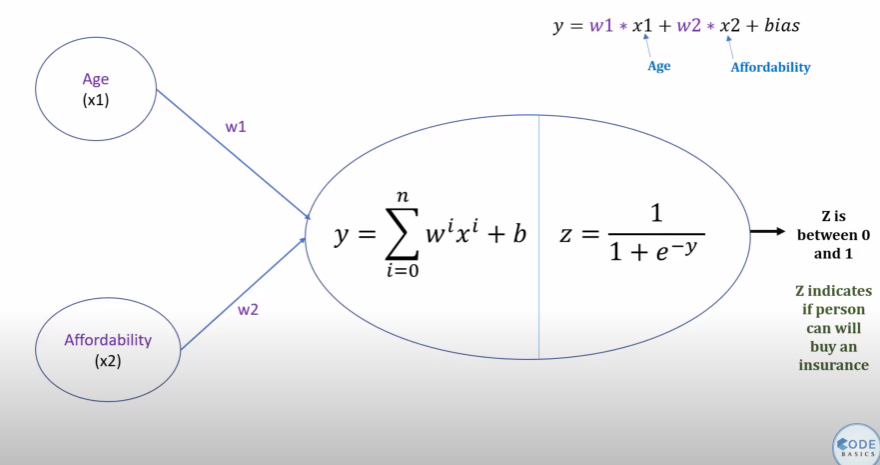


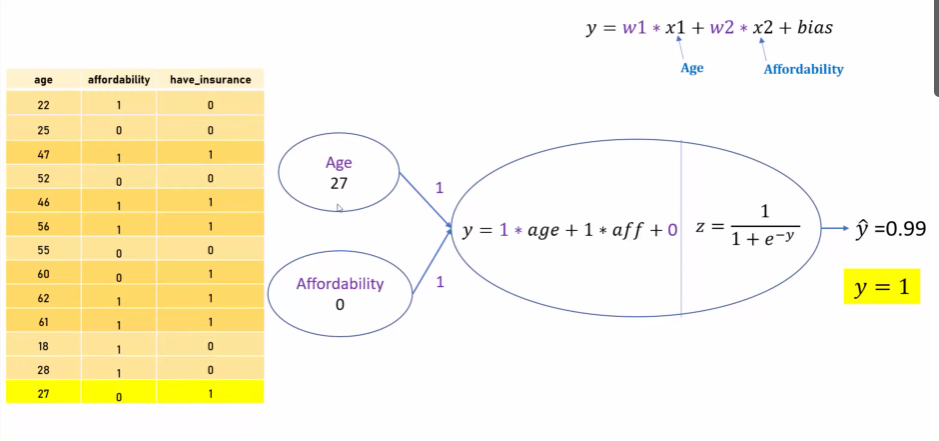


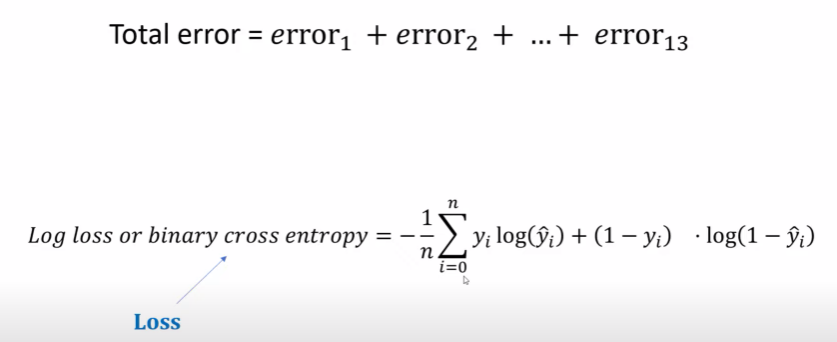


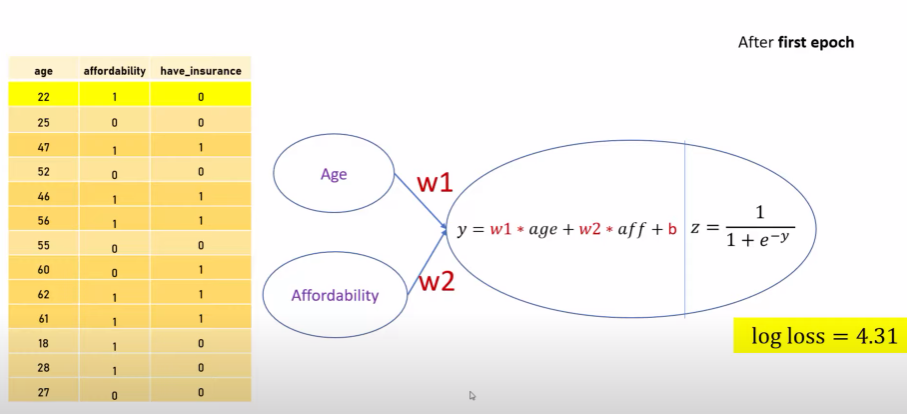


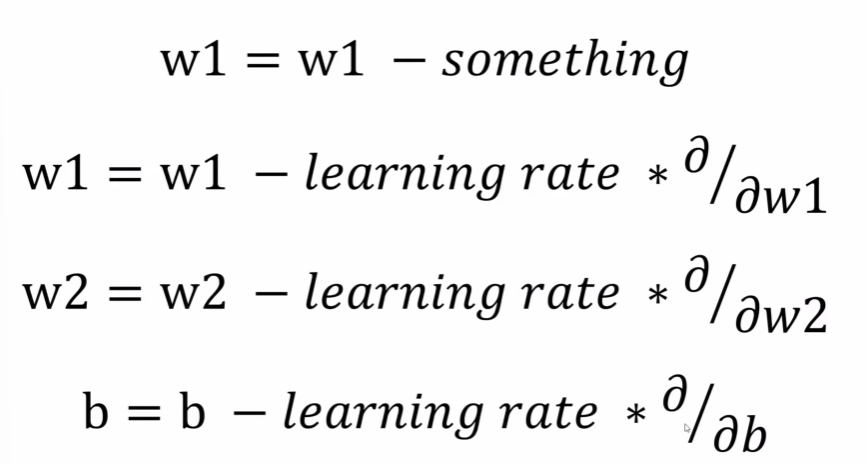


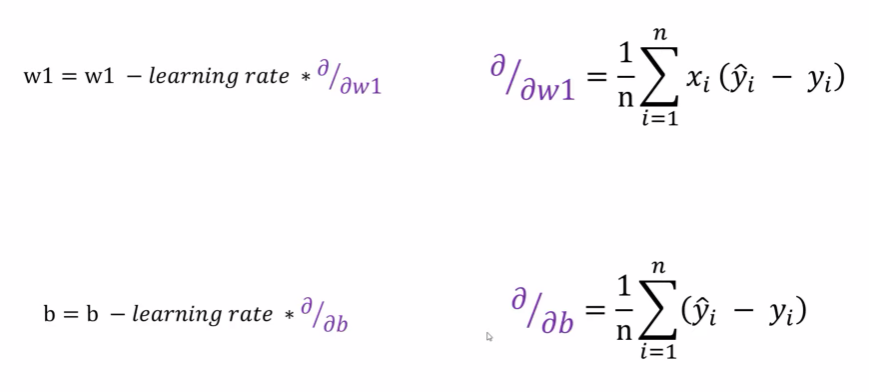


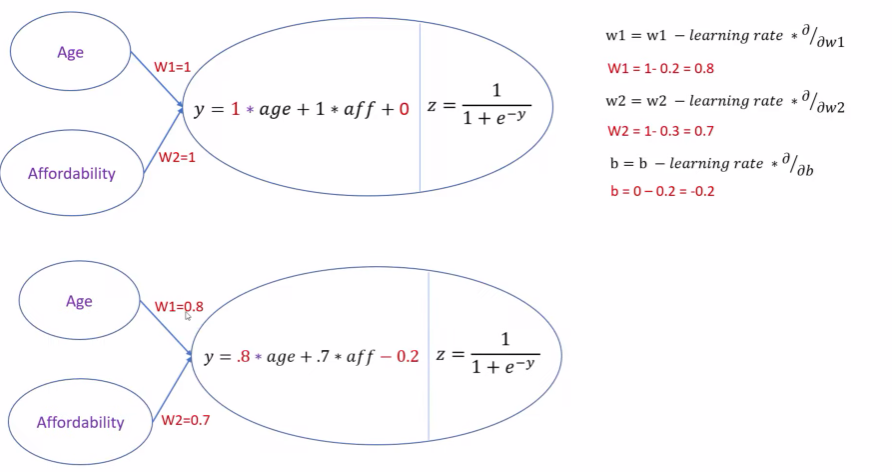


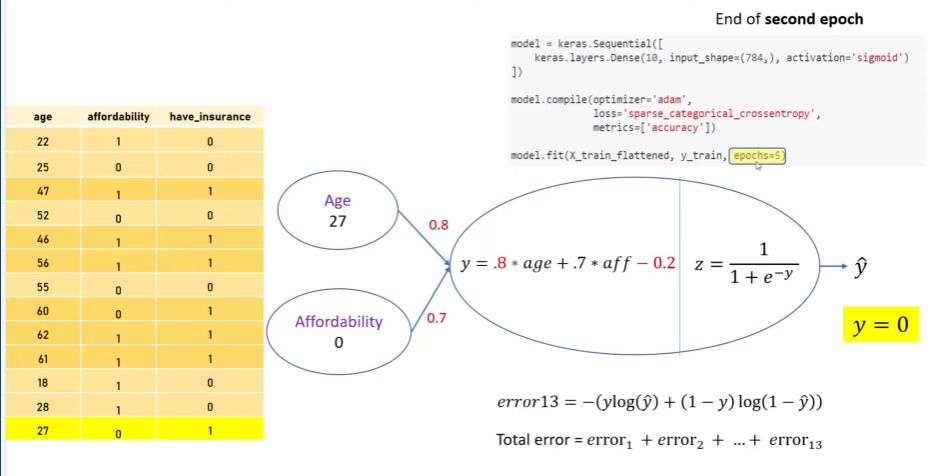


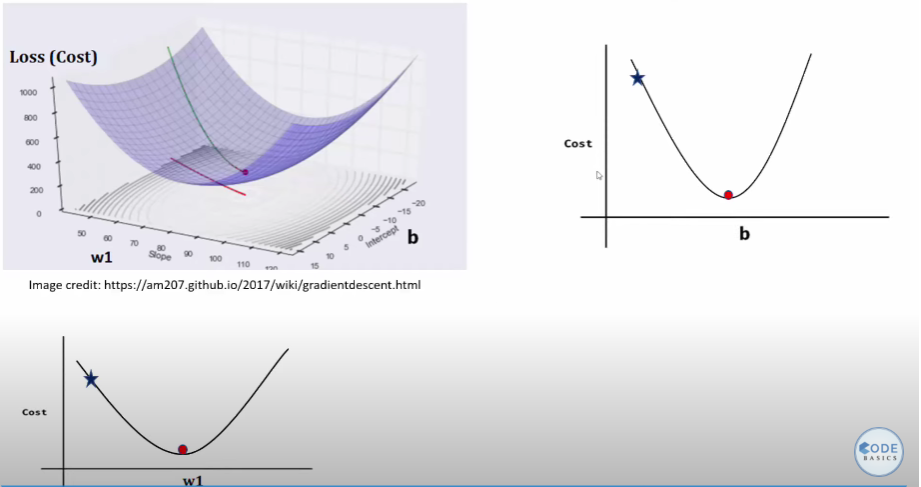


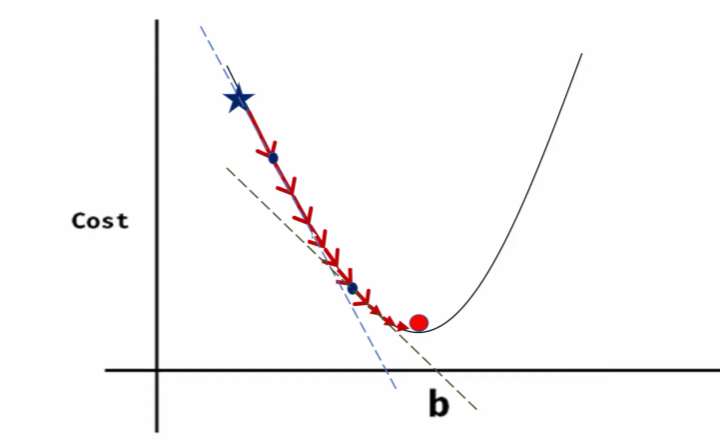


<h3 style="color:green" align="center">Linear equaltion using gradient descent Implement Gradient Descent For Neural Network (or Logistic Regression)</h3>


**<font color="blue">Predicting if a person would buy life insurnace based on his age using logistic regression</font>**

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).


In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [36]:
df = pd.read_csv("insurace_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'affordibility']], df['bought_insurance'], test_size=0.2, random_state=25)

In [38]:
len(X_train)

22

In [39]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [40]:
model = keras.Sequential([

    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 1s 864ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 11/5000
1/1

In [41]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 241ms/step - loss: 0.3550 - accuracy: 1.0000


[0.3549775183200836, 1.0]

In [42]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [43]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 107ms/step


array([[0.70548487],
       [0.35569552],
       [0.16827849],
       [0.47801173],
       [0.7260697 ],
       [0.82949835]], dtype=float32)

In [44]:
coef, intercept = model.get_weights()
coef, intercept

(array([[5.060867 ],
        [1.4086502]], dtype=float32),
 array([-2.9137027], dtype=float32))

In [45]:
def sigmoid(x):
    import math
    return 1 / (1 + math.exp(-x))


sigmoid(18)

0.9999999847700205

In [46]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0] * age + coef[1] * affordibility + intercept
    return sigmoid(weighted_sum)

In [47]:
prediction_function(.47, 1)

C:\Users\91630\AppData\Local\Temp\ipykernel_9344\1120213890.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.7054848693136117

In [48]:
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# def log_loss(y_true, y_pred):
#     epsilon = 1e-15
#     y_predicted_new = [max(i, epsilon) for i in y_pred]
#     y_predicted_new = [min(i, 1 - epsilon) for i in y_predicted_new]
#     y_pred = np.array(y_predicted_new)
#     return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [49]:
def sigmoid_numpy(X):
    return 1 / (1 + np.exp(-X))


sigmoid_numpy(np.array([12, 0, 1]))

array([0.99999386, 0.5       , 0.73105858])

In [50]:
def gradient_descent(age, affordibility, y_true, epochs, loss_threshold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(X_train)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordibility + bias
        y_predicted = sigmoid_numpy(weighted_sum)

        loss = log_loss(y_true, y_predicted)

        w1d = (1 / n) * np.dot(np.transpose(age), (y_predicted - y_true))
        w2d = (1 / n) * np.dot(np.transpose(affordibility), (y_predicted - y_true))

        bias_d = np.mean(y_predicted - y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss <= loss_threshold:
            break

    return w1, w2, bias

In [51]:
gradient_descent(X_train_scaled['age'], X_train_scaled['affordibility'], y_train, 1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [52]:
coef, intercept

(array([[5.060867 ],
        [1.4086502]], dtype=float32),
 array([-2.9137027], dtype=float32))

**This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function**


## <font color='green' size='15' align='center'>Creating own neural network from scratch</font>


In [ ]:
class myNeuralNetwork:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    def fit(self, X, y, epochs, loss_threshold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'], X['affordibility'], y, epochs, loss_threshold)

    def predict(self, X_test):
        weighted_sum = self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age, affordibility, y_true, epochs, loss_threshold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(X_train)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordibility + bias
            y_predicted = sigmoid_numpy(weighted_sum)

            loss = log_loss(y_true, y_predicted)

            w1d = (1 / n) * np.dot(np.transpose(age), (y_predicted - y_true))
            w2d = (1 / n) * np.dot(np.transpose(affordibility), (y_predicted - y_true))

            bias_d = np.mean(y_predicted - y_true)

            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d

            if i % 50 == 0:
                print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss <= loss_threshold:
                print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break
        return w1, w2, bias

In [54]:
customModel = myNeuralNetwork()
customModel.fit(X_train_scaled, y_train, 1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.5033195541731388, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572747, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917


In [55]:
coef, intercept

(array([[5.060867 ],
        [1.4086502]], dtype=float32),
 array([-2.9137027], dtype=float32))

In [56]:
customModel.predict(X_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

In [57]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 38ms/step


array([[0.70548487],
       [0.35569552],
       [0.16827849],
       [0.47801173],
       [0.7260697 ],
       [0.82949835]], dtype=float32)